In [2]:
# mnist_cnn.py
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [3]:
# Load and preprocess MNIST dataset
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for CNN (add channel dimension)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to categorical
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print("Data preprocessing completed!")

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Data preprocessing completed!


In [7]:
# Build CNN model
print("Building CNN model...")
model = keras.Sequential([
    # First convolutional block
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),  # Prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("\nModel Architecture:")
model.summary()

# Train the model
print("\nTraining the model...")
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

if test_accuracy > 0.95:
    print("✅ Target accuracy of >95% achieved!")
else:
    print("❌ Target accuracy not reached. Consider training longer or adjusting hyperparameters.")

# Make predictions
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


Building CNN model...

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 96ms/step - accuracy: 0.7375 - loss: 0.8065 - val_accuracy: 0.9796 - val_loss: 0.0698
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.9618 - loss: 0.1327 - val_accuracy: 0.9866 - val_loss: 0.0398
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.9728 - loss: 0.0926 - val_accuracy: 0.9878 - val_loss: 0.0356
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.9802 - loss: 0.0697 - val_accuracy: 0.9906 - val_loss: 0.0289
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.9856 - loss: 0.0531 - val_accuracy: 0.9924 - val_loss: 0.0273
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 98ms/step - accuracy: 0.9871 - loss: 0.0468 - val_accuracy: 0.9913 - val_loss: 0.0278
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.9869 - loss: 0.0444 - val_accuracy: 0.9929 - val_loss: 0.0254
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0

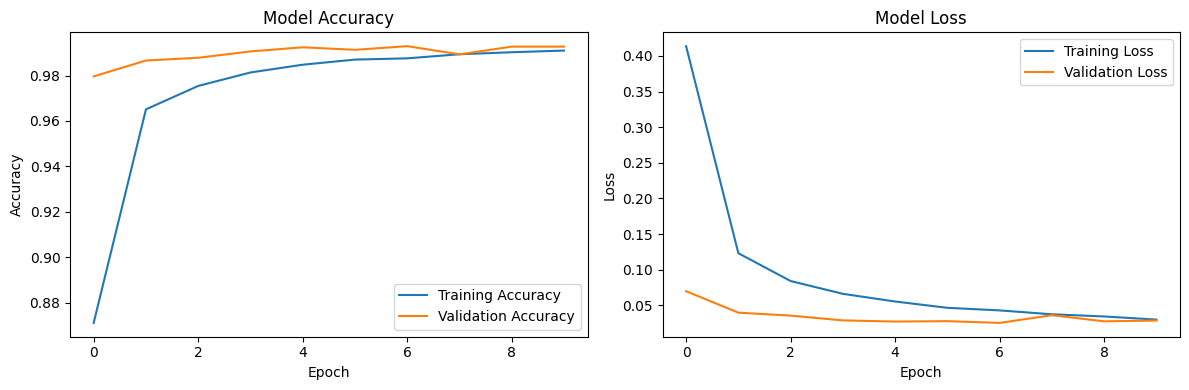


Visualizing predictions on sample images...


<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

In [8]:
# Visualize training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize predictions on 5 sample images
print("\nVisualizing predictions on sample images...")
plt.figure(figsize=(15, 3))


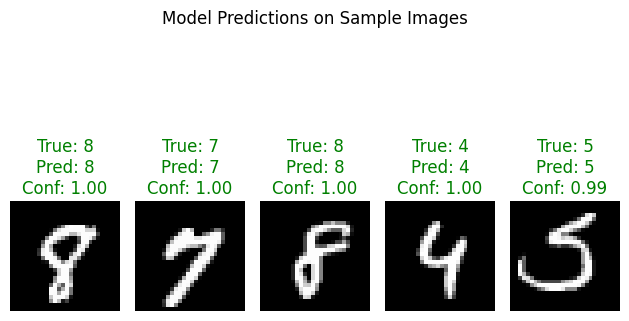


Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      1.00      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Model training and evaluation completed!


In [9]:

# Select 5 random test images
sample_indices = np.random.choice(len(x_test), 5, replace=False)

for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')

    true_label = y_test[idx]
    predicted_label = predicted_classes[idx]
    confidence = predictions[idx][predicted_label]

    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f'True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}',
              color=color)
    plt.axis('off')

plt.suptitle('Model Predictions on Sample Images')
plt.tight_layout()
plt.show()

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, predicted_classes))

print("\nModel training and evaluation completed!")